# Plotting Lagrangian shape functions in 1d

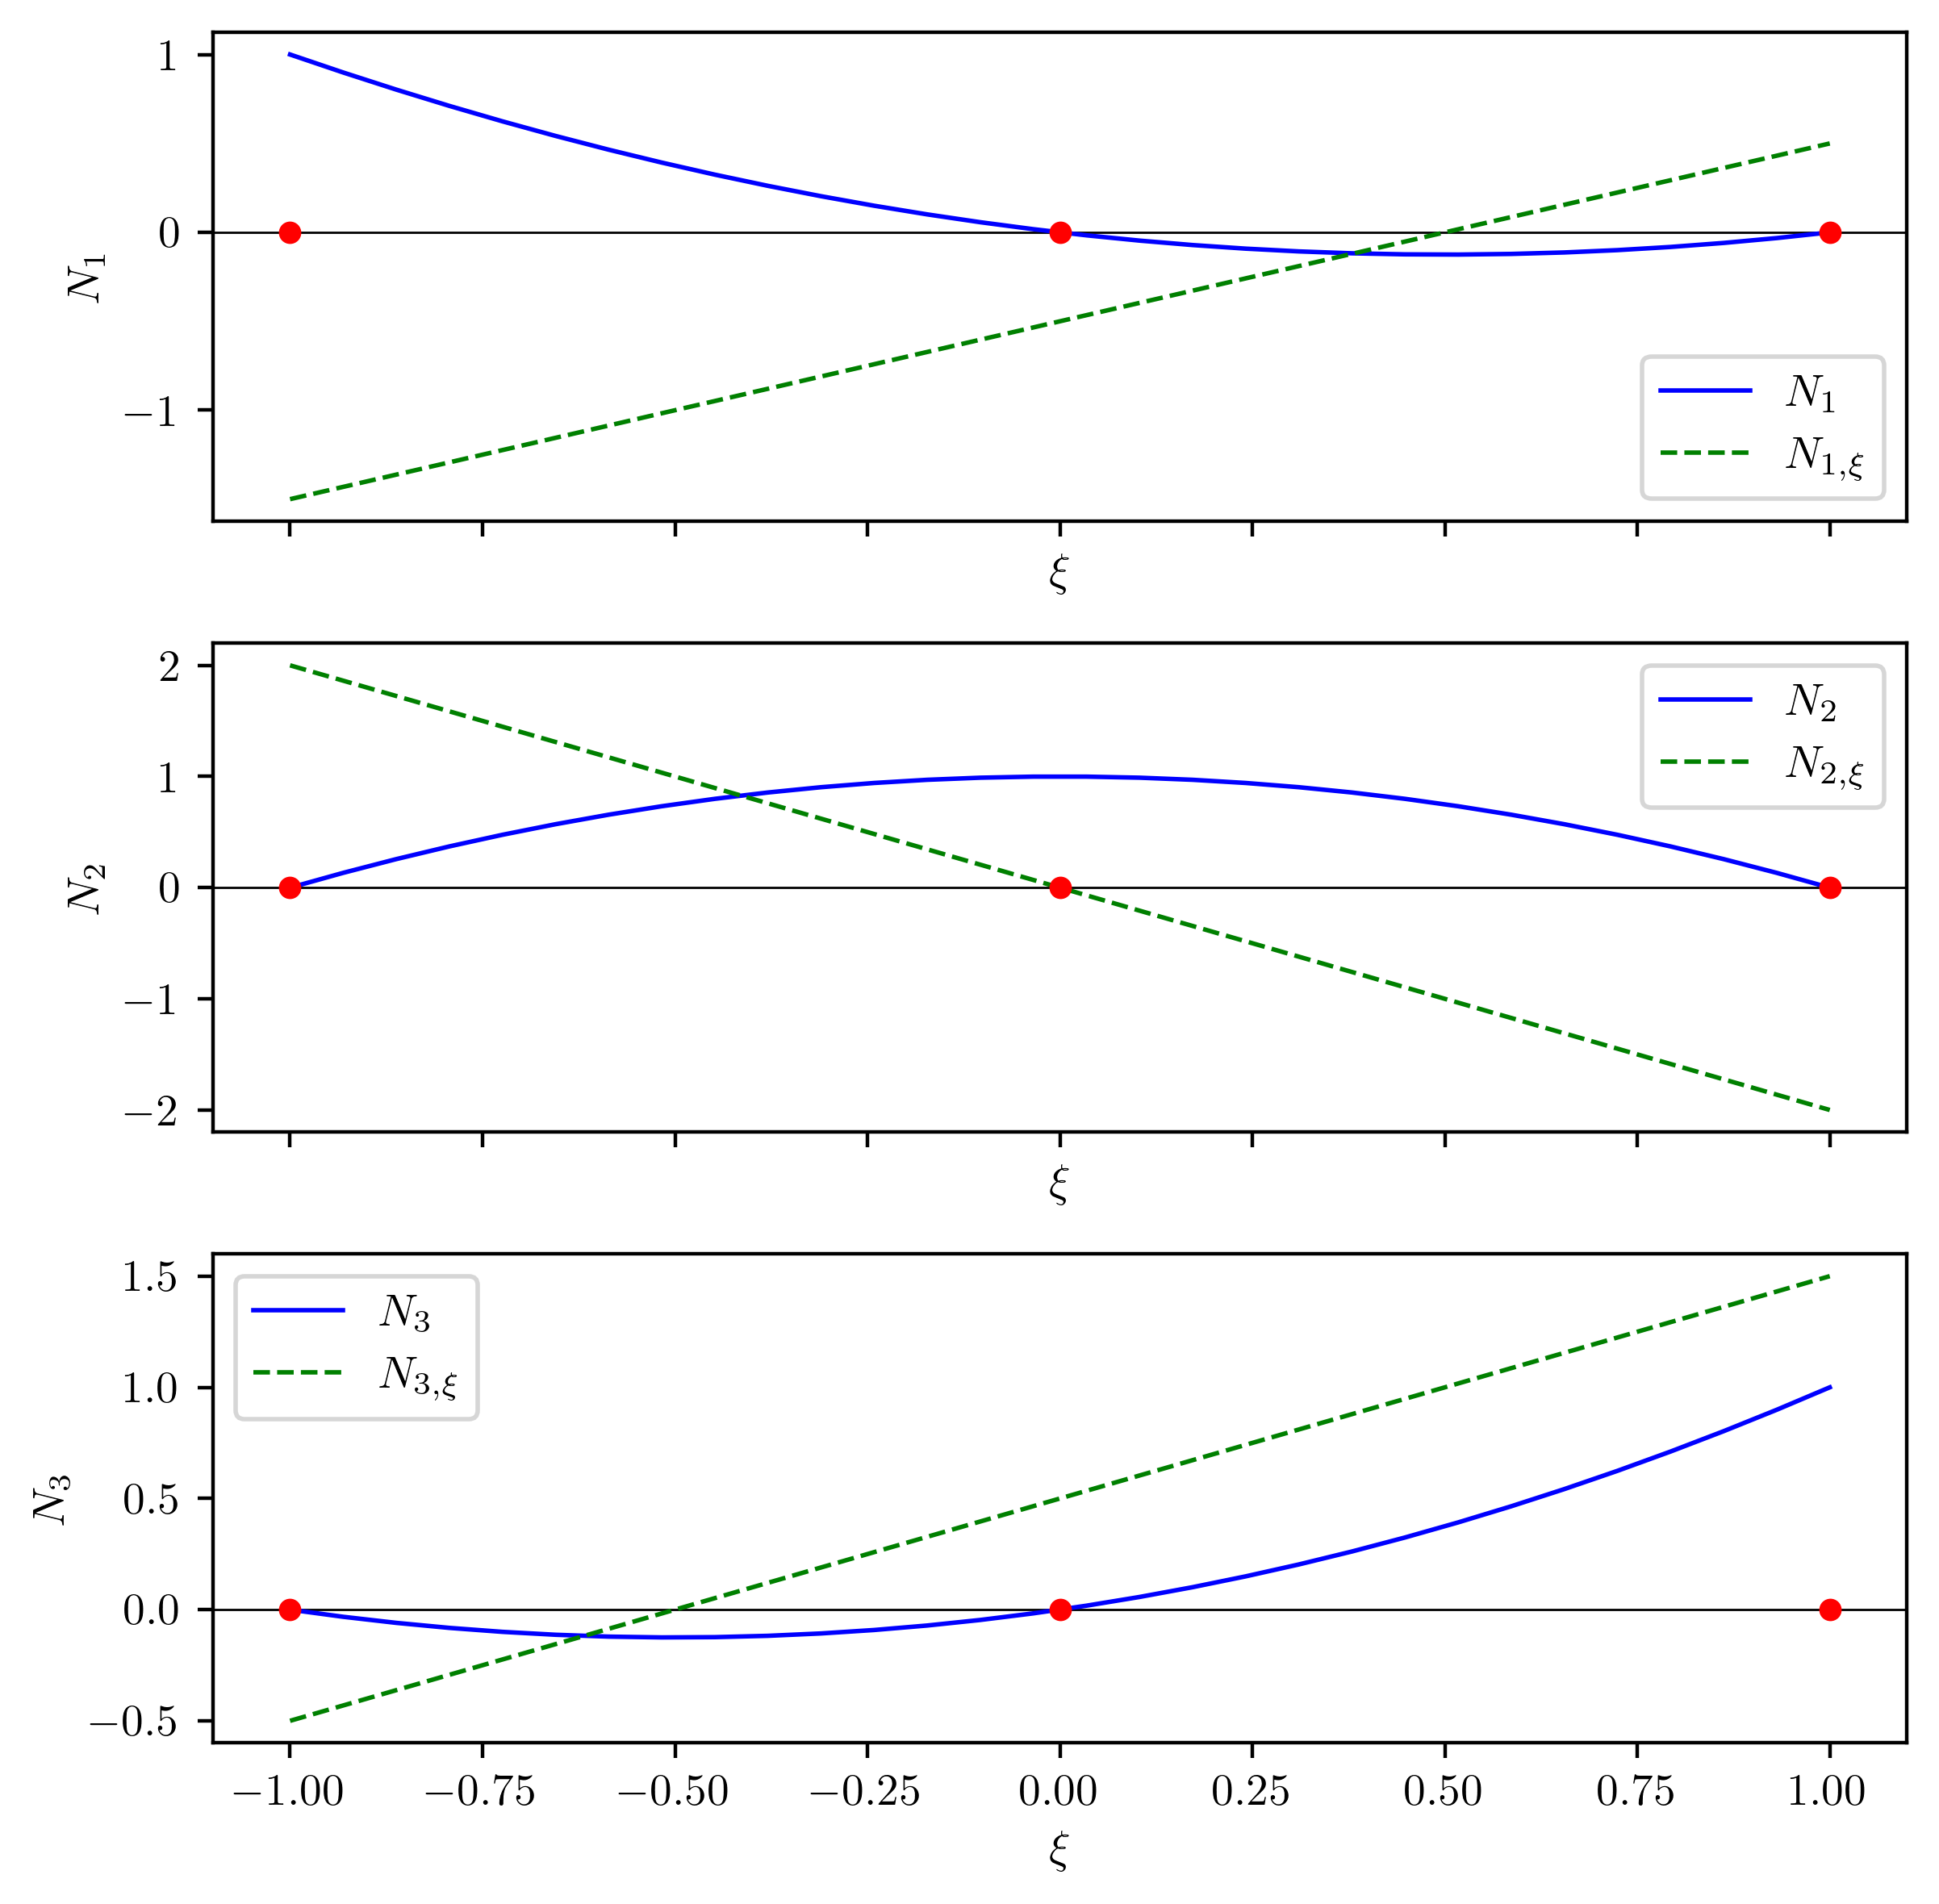

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sigmaepsilon.mesh.cells import L3 as Cell
#from sigmaepsilon.mesh.cells import L2 as Cell

rng = [-1, 1]
points = np.linspace(*rng, 30)
nodes = np.linspace(*rng, Cell.NNODE)
shp = Cell.shape_function_values(points, rng=rng)
dshp = Cell.shape_function_derivatives(points, rng=rng)

fig, axs = plt.subplots(Cell.NNODE, 1, figsize=(6, 6), dpi=400, sharex=True)

for i in range(Cell.NNODE):
    axs[i].axhline(y=0, color="black", linewidth=0.5)
    axs[i].plot(
        points,
        shp[:, i],
        "b-",
        markersize=4,
        linewidth=1,
        label=r"$N_{}$".format(i + 1),
    )
    axs[i].plot(
        points,
        dshp[:, i, 0],
        "g--",
        markersize=4,
        linewidth=1,
        label=r"$N_{}$".format("{" + str(i + 1) + "," + r"\xi" "}"),
    )
    axs[i].plot(
        nodes,
        [
            0,
        ]
        * Cell.NNODE,
        "ro",
        markersize=4,
    )
    axs[i].set_xlabel(r"$\xi$")
    axs[i].set_ylabel(r"$N_{}$".format(i + 1))

for ax in axs:
    ax.legend()

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "sans-serif",
    }
)